### Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load & Preprocessing for target uni-variable analysis

In [32]:
data_dict = pd.read_excel("./data/Lead Scoring X Online Education/Leads X Education Data Dictionary.xlsx", header=2)
data_dict = data_dict.drop("Unnamed: 0", axis=1)
data_dict

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


In [33]:
df = pd.read_csv("./data/Lead Scoring X Online Education/Leads X Education.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [35]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [36]:
df.describe(include="object").T

,count,unique,top,freq
Prospect ID,9240,9240,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1
Lead Origin,9240,5,Landing Page Submission,4886
Lead Source,9204,21,Google,2868
Do Not Email,9240,2,No,8506
Do Not Call,9240,2,No,9238
Last Activity,9137,17,Email Opened,3437
Country,6779,38,India,6492
Specialization,7802,19,Select,1942
How did you hear about X Education,7033,10,Select,5043
What is your current occupation,6550,6,Unemployed,5600


In [37]:
df["Prospect ID"].nunique()

9240

In [38]:
df["Lead Number"].nunique()

9240

In [39]:
df = df.drop("Prospect ID", axis=1)

In [40]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# df["Search"].value_counts()
# df["Newspaper Article"].value_counts()
# df["X Education Forums"].value_counts()
# df["Newspaper"].value_counts()
# df["Digital Advertisement"].value_counts()
# df["Through Recommendations"].value_counts()
# df["Receive More Updates About Our Courses"].value_counts()
# df["Magazine"].value_counts()
# df["Update me on Supply Chain Content"].value_counts(dropna=False)
# df["Get updates on DM Content"].value_counts(dropna=False)

In [42]:
df = df.drop(["Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement",
              "Through Recommendations", "Receive More Updates About Our Courses", "Magazine", "Search",
              "Update me on Supply Chain Content", "Get updates on DM Content",
              "I agree to pay the amount through cheque"], axis=1)

In [43]:
df["Lead Origin"].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [44]:
df = df.drop(["Lead Origin"], axis=1)
df.shape

(9240, 24)

### Univariate analysis for target (conversion rate)

### Acquisition Channel analysis

In [45]:
df["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [46]:
df = df.dropna(axis=0, subset=["Lead Source"])
df.loc[df["Lead Source"] == "google", "Lead Source"] = "Google"
lead_source = df["Lead Source"].value_counts(dropna=False).head(8).index

In [47]:
df = df.loc[df["Lead Source"].isin(lead_source), :]
df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Name: Lead Source, dtype: int64

In [48]:
grouped = df.groupby(["Lead Source", "Converted"])["Converted"].count().unstack().reset_index()
grouped = grouped.rename(columns={0: "Not converted", 1: "Converted"})
grouped["Total number of lead"] = grouped["Not converted"] + grouped["Converted"]
grouped["Conversion Rate"] = np.round(grouped["Converted"].div(grouped["Total number of lead"]) * 100, 2)
grouped = grouped.sort_values(by="Conversion Rate", ascending=False).reset_index(drop=True)
grouped

Converted,Lead Source,Not converted,Converted,Total number of lead,Conversion Rate
0,Welingak Website,2,140,142,98.59
1,Reference,44,490,534,91.76
2,Google,1726,1147,2873,39.92
3,Organic Search,718,436,1154,37.78
4,Direct Traffic,1725,818,2543,32.17
5,Olark Chat,1307,448,1755,25.53
6,Referral Sites,94,31,125,24.80
7,Facebook,42,13,55,23.64


#### Insight for acquision channel
- among acquisition channels, Welingak Website and Reference, Google are significant for conversion
- consider focusing on paying marketing campaign on Welingak Website, Google search
- reference acquisition are great in conversion thus, this showing positive sign for customer satisfaction
- viral marketing & customer community space management could be an option to develop

### Email & Call option analysis

In [49]:
df.groupby(["Do Not Email", "Converted"])["Converted"].count()

Do Not Email  Converted
No            0            5048
              1            3415
Yes           0             610
              1             108
Name: Converted, dtype: int64

In [50]:
df.groupby(["Do Not Call", "Converted"])["Converted"].count()

Do Not Call  Converted
No           0            5658
             1            3521
Yes          1               2
Name: Converted, dtype: int64

#### Insight for email & call option in the visitor form
- Clicking email & call option do not seem relevant to the conversion rate
- By seeing that quite a number of visitors who didn't check email & call at the end converted

### Website traffic analysis

<AxesSubplot:>

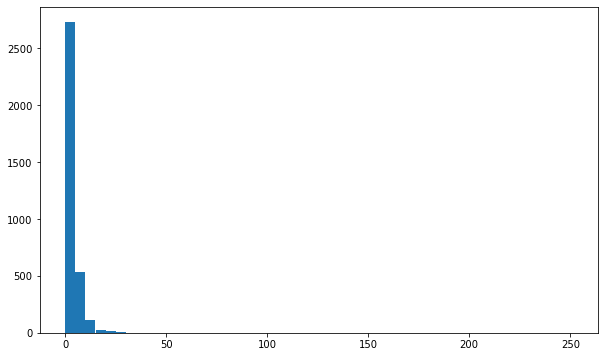

In [51]:
df[df["Converted"] == 1]["TotalVisits"].hist(bins=50, figsize=(10, 6), grid=False)

<AxesSubplot:>

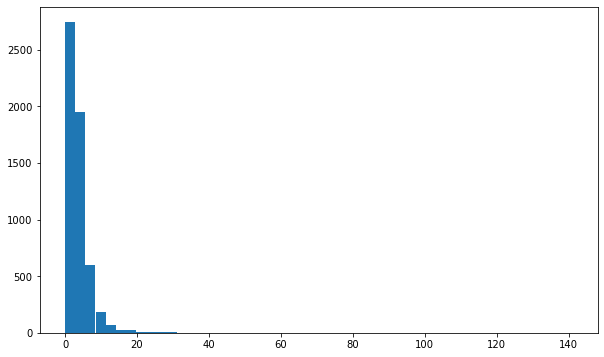

In [52]:
df[df["Converted"] == 0]["TotalVisits"].hist(bins=50, figsize=(10, 6), grid=False)

<AxesSubplot:>

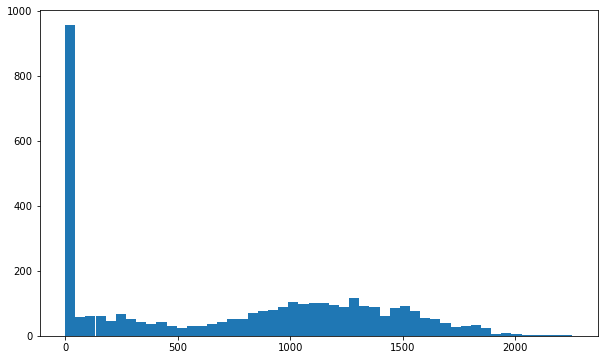

In [53]:
df[df["Converted"] == 1]["Total Time Spent on Website"].hist(bins=50, figsize=(10, 6), grid=False)

<AxesSubplot:>

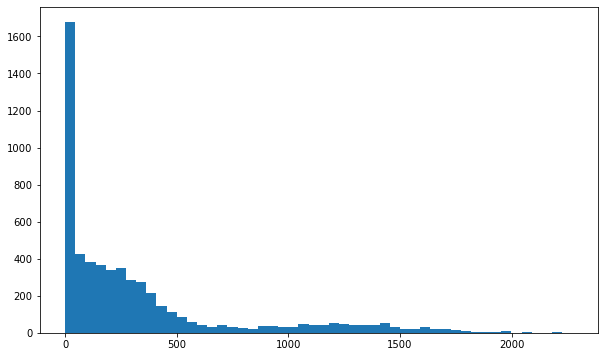

In [54]:
df[df["Converted"] == 0]["Total Time Spent on Website"].hist(bins=50, figsize=(10, 6), grid=False)

<AxesSubplot:>

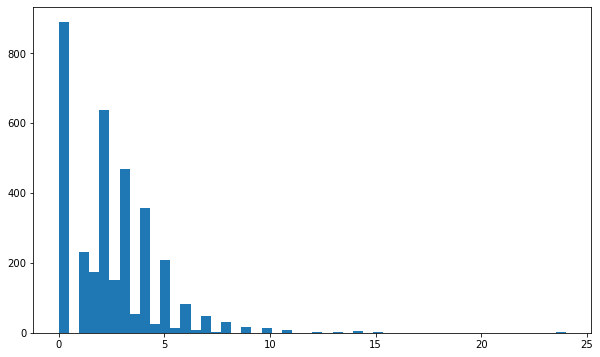

In [55]:
df[df["Converted"] == 1]["Page Views Per Visit"].hist(bins=50, figsize=(10, 6), grid=False)

<AxesSubplot:>

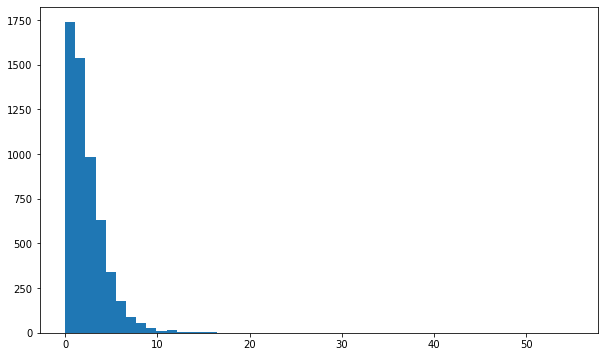

In [56]:
df[df["Converted"] == 0]["Page Views Per Visit"].hist(bins=50, figsize=(10, 6), grid=False)

#### Insight for Website activities
- Website activities data seems like delusive metrics for conversion rate
- converted & not converted visitors's behavior in website traffic show the similar pattern in data
- In terms of UX, suggestion could be consider re-design the website interface for visitors to be converted

### Last activity analysis

In [57]:
df.loc[df["Converted"] == 1, "Last Activity"].value_counts()

SMS Sent                        1703
Email Opened                    1246
Page Visited on Website          150
Olark Chat Conversation           83
Email Link Clicked                73
Converted to Lead                 54
Unreachable                       31
Form Submitted on Website         28
Email Bounced                     24
Had a Phone Conversation          22
Unsubscribed                      14
Approached upfront                 9
Email Received                     2
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
last_activity = (df.groupby(["Last Activity", "Converted"])
                            ["Converted"]
                            .count()
                            .unstack()
                            .fillna(0)
                            .astype(int)
                            .rename(columns={0: "Not converted", 1: "Converted"})
                            .assign(Total=df.groupby(["Last Activity"])["Converted"].count())
                            .reset_index()
                 )
last_activity["Conversion rate"] = (last_activity["Converted"].div(last_activity["Total"]) * 100).round(2)
last_activity

Converted,Last Activity,Not converted,Converted,Total,Conversion rate
0,Approached upfront,0,9,9,100.00
1,Converted to Lead,372,54,426,12.68
2,Email Bounced,297,24,321,7.48
3,Email Link Clicked,194,73,267,27.34
4,Email Marked Spam,0,2,2,100.00
5,Email Opened,2176,1246,3422,36.41
6,Email Received,0,2,2,100.00
7,Form Submitted on Website,88,28,116,24.14
8,Had a Phone Conversation,8,22,30,73.33
9,Olark Chat Conversation,889,83,972,8.54


In [59]:
def conversion_rate(df_, column_name):
    grouped = (df_.groupby([str(column_name), "Converted"])
                           ["Converted"]
                           .count()
                           .unstack()
                           .fillna(0)
                           .astype(int)
                           .rename(columns={0: "Not converted", 1: "Converted"})
                           .assign(Total=df.groupby([str(column_name)])["Converted"].count())
                           .reset_index()
                          )
    grouped["Conversion rate"] = (grouped["Converted"].div(grouped["Total"]) * 100).round(2)
    grouped = grouped.sort_values(by="Conversion rate", ascending=False)
    return grouped

In [60]:
df["Last Notable Activity"] = df["Last Notable Activity"].fillna("Unknown")
conversion_rate(df, "Last Notable Activity")

Converted,Last Notable Activity,Not converted,Converted,Total,Conversion rate
0,Approached upfront,0,1,1,100.00
3,Email Marked Spam,0,2,2,100.00
5,Email Received,0,1,1,100.00
11,Resubscribed to emails,0,1,1,100.00
7,Had a Phone Conversation,1,13,14,92.86
12,SMS Sent,663,1486,2149,69.15
13,Unreachable,10,22,32,68.75
4,Email Opened,1776,1038,2814,36.89
10,Page Visited on Website,224,92,316,29.11
14,Unsubscribed,32,12,44,27.27


#### Insight for last_activity data
- Approached upfront people converted all thus, this shows that offline marketing activity is effective
- Had a Phone Conversation could be a good sign that these people who talked would be converted highly
- Email Link Clicked & Open, SMS Sent people are the group that need further analysis for causality finding
- Other data seems to be unrelevant

### Demographic analysis

In [61]:
df["Country"].value_counts(dropna=False)

India                   6474
NaN                     2421
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     3
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [62]:
df["Country"] = df["Country"].fillna("Unknown")
conversion_rate(df, "Country")

Converted,Country,Not converted,Converted,Total,Conversion rate
7,Denmark,0,1,1,100.00
2,Bahrain,3,4,7,57.14
11,Hong Kong,3,4,7,57.14
0,Asia/Pacific Region,1,1,2,50.00
21,Oman,3,3,6,50.00
8,France,3,3,6,50.00
19,Netherlands,1,1,2,50.00
3,Bangladesh,1,1,2,50.00
26,Singapore,13,11,24,45.83
36,Unknown,1377,1044,2421,43.12


In [63]:
df["Specialization"] = df["Specialization"].fillna("Unknown")
df["Specialization"].value_counts(dropna=False)

Select                               1911
Unknown                              1435
Finance Management                    972
Human Resource Management             842
Marketing Management                  835
Operations Management                 500
Business Administration               401
IT Projects Management                366
Supply Chain Management               347
Banking, Investment And Insurance     338
Media and Advertising                 202
Travel and Tourism                    201
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [64]:
specialization = (df.groupby(["Specialization", "Converted"])
                            ["Converted"]
                            .count()
                            .unstack()
                            .fillna(0)
                            .astype(int)
                            .rename(columns={0: "Not converted", 1: "Converted"})
                            .assign(Total=df.groupby(["Specialization"])["Converted"].count())
                            .reset_index()
                 )
specialization["Conversion rate"] = (specialization["Converted"].div(specialization["Total"]) * 100).round(2)
specialization.sort_values(by="Conversion rate", ascending=False)

Converted,Specialization,Not converted,Converted,Total,Conversion rate
0,"Banking, Investment And Insurance",171,167,338,49.41
5,Healthcare Management,80,78,158,49.37
10,Marketing Management,429,406,835,48.62
12,Operations Management,263,237,500,47.40
7,Human Resource Management,458,384,842,45.61
1,Business Administration,222,179,401,44.64
4,Finance Management,540,432,972,44.44
17,Supply Chain Management,197,150,347,43.23
14,Rural and Agribusiness,42,31,73,42.47
6,Hospitality Management,66,48,114,42.11


<AxesSubplot:>

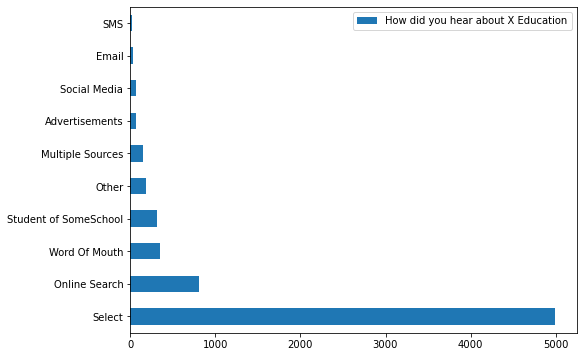

In [65]:
df["How did you hear about X Education"].value_counts().plot(kind="barh", figsize=(8,6), legend=True)

In [66]:
how_hear = (df.groupby(["How did you hear about X Education", "Converted"])
                            ["Converted"]
                            .count()
                            .unstack()
                            .fillna(0)
                            .astype(int)
                            .rename(columns={0: "Not converted", 1: "Converted"})
                            .assign(Total=df.groupby(["How did you hear about X Education"])["Converted"].count())
                            .reset_index()
                 )
how_hear["Conversion rate"] = (how_hear["Converted"].div(how_hear["Total"]) * 100).round(2)
how_hear.sort_values(by="Conversion rate", ascending=False)

Converted,How did you hear about X Education,Not converted,Converted,Total,Conversion rate
1,Email,13,13,26,50.00
6,Select,2600,2398,4998,47.98
8,Student of SomeSchool,167,142,309,45.95
0,Advertisements,37,31,68,45.59
9,Word Of Mouth,196,150,346,43.35
3,Online Search,463,343,806,42.56
7,Social Media,39,27,66,40.91
4,Other,111,75,186,40.32
2,Multiple Sources,96,56,152,36.84
5,SMS,18,5,23,21.74


In [67]:
df["What is your current occupation"] = df["What is your current occupation"].fillna("Unknown")
conversion_rate(df, "What is your current occupation")

Converted,What is your current occupation,Not converted,Converted,Total,Conversion rate
1,Housewife,0,10,10,100.00
6,Working Professional,59,645,704,91.62
0,Businessman,3,5,8,62.50
2,Other,6,10,16,62.50
4,Unemployed,3145,2407,5552,43.35
3,Student,132,77,209,36.84
5,Unknown,2313,369,2682,13.76


In [68]:
df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6477
NaN                          2701
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [69]:
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].fillna("Unknown")
conversion_rate(df, "What matters most to you in choosing a course")

Converted,What matters most to you in choosing a course,Not converted,Converted,Total,Conversion rate
1,Flexibility & Convenience,1,1,2,50.00
0,Better Career Prospects,3324,3153,6477,48.68
3,Unknown,2332,369,2701,13.66
2,Other,1,0,1,0.00


In [70]:
df["City"].value_counts(dropna=False)

Mumbai                         3212
Select                         2214
NaN                            1415
Thane & Outskirts               747
Other Cities                    685
Other Cities of Maharashtra     455
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [71]:
df["City"] = df["City"].fillna("Unknown")
conversion_rate(df, "City")

Converted,City,Not converted,Converted,Total,Conversion rate
4,Select,1138,1076,2214,48.60
5,Thane & Outskirts,412,335,747,44.85
2,Other Cities of Maharashtra,255,200,455,43.96
3,Other Metro Cities,225,154,379,40.63
0,Mumbai,1909,1303,3212,40.57
1,Other Cities,409,276,685,40.29
6,Tier II Cities,49,25,74,33.78
7,Unknown,1261,154,1415,10.88


#### Insight for potential lead's motivation, profile
- Housewife, Working Professional group are highly converted thus, consider to target marketing for these groups
- Need further analysis in these two groups in terms of customer profile details
- Value Preposition of the product seems to be "Better Career Prospects" by seeing the data
- It means that the product provides graduate education condents to those who already have a job
- Location does not seem a factor in conversion cos all the cities showing similar conversion rate

### Lead evaluating metrics

In [72]:
df["Lead Quality"].value_counts(dropna=False)

NaN                  4740
Might be             1542
Not Sure             1088
High in Relevance     631
Worst                 599
Low in Relevance      581
Name: Lead Quality, dtype: int64

In [73]:
df["Lead Quality"] = df["Lead Quality"].fillna("Unknown")
conversion_rate(df, "Lead Quality")

Converted,Lead Quality,Not converted,Converted,Total,Conversion rate
0,High in Relevance,33,598,631,94.77
1,Low in Relevance,106,475,581,81.76
2,Might be,378,1164,1542,75.49
3,Not Sure,823,265,1088,24.36
4,Unknown,3731,1009,4740,21.29
5,Worst,587,12,599,2.00


#### Insight for lead quality metric
- High relevance & low, might be groups showing significant conversion rate
- company's labeling lead quality framework looks like working good

In [74]:
df["Lead Profile"].value_counts(dropna=False)

Select                         4108
NaN                            2701
Potential Lead                 1603
Other Leads                     486
Student of SomeSchool           239
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [75]:
df["Lead Profile"] = df["Lead Profile"].fillna("Unknown")
conversion_rate(df, "Lead Profile")

Converted,Lead Profile,Not converted,Converted,Total,Conversion rate
0,Dual Specialization Student,0,20,20,100.00
1,Lateral Student,1,23,24,95.83
3,Potential Lead,345,1258,1603,78.48
4,Select,2444,1664,4108,40.51
2,Other Leads,306,180,486,37.04
6,Unknown,2332,369,2701,13.66
5,Student of SomeSchool,230,9,239,3.77


In [76]:
df["Asymmetrique Activity Index"].value_counts(dropna=False)

NaN          4191
02.Medium    3811
01.High       817
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [77]:
df["Asymmetrique Activity Index"] = df["Asymmetrique Activity Index"].fillna("Unknown")
conversion_rate(df, "Asymmetrique Activity Index")

Converted,Asymmetrique Activity Index,Not converted,Converted,Total,Conversion rate
1,02.Medium,2199,1612,3811,42.30
3,Unknown,2556,1635,4191,39.01
0,01.High,574,243,817,29.74
2,03.Low,329,33,362,9.12


In [78]:
df["Asymmetrique Activity Score"] = df["Asymmetrique Activity Score"].fillna("Unknown")
conversion_rate(df, "Asymmetrique Activity Score")

Converted,Asymmetrique Activity Score,Not converted,Converted,Total,Conversion rate
8,15.0,467,814,1281,63.54
9,16.0,239,226,465,48.60
7,14.0,1057,700,1757,39.84
12,Unknown,2556,1635,4191,39.01
6,13.0,675,98,773,12.68
5,12.0,173,23,196,11.73
4,11.0,88,7,95,7.37
3,10.0,54,3,57,5.26
10,17.0,331,17,348,4.89
0,7.0,1,0,1,0.00


#### Insight for activity metric
- it does not match the group with conversion rate
- Might need to consider to reframe the metric allocation

In [79]:
df["Asymmetrique Profile Index"] = df["Asymmetrique Profile Index"].fillna("Unknown")
conversion_rate(df, "Asymmetrique Profile Index")

Converted,Asymmetrique Profile Index,Not converted,Converted,Total,Conversion rate
2,03.Low,15,15,30,50.00
0,01.High,1155,1040,2195,47.38
3,Unknown,2556,1635,4191,39.01
1,02.Medium,1932,833,2765,30.13


In [80]:
df["Asymmetrique Profile Score"] = df["Asymmetrique Profile Score"].fillna("Unknown")
conversion_rate(df, "Asymmetrique Profile Score")

Converted,Asymmetrique Profile Score,Not converted,Converted,Total,Conversion rate
8,19.0,62,182,244,74.59
9,20.0,90,218,308,70.78
0,11.0,4,5,9,55.56
1,12.0,11,10,21,47.62
6,17.0,316,257,573,44.85
5,16.0,350,230,580,39.66
10,Unknown,2556,1635,4191,39.01
7,18.0,687,383,1070,35.79
4,15.0,1257,500,1757,28.46
3,14.0,169,56,225,24.89


#### Insight for profile metric
- Score 19 & 20 seem to target right group for conversion
- Further analysis in Score 19 & 20 group for their customer profile information

In [81]:
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].fillna("Unknown")
conversion_rate(df, "A free copy of Mastering The Interview")

Converted,A free copy of Mastering The Interview,Not converted,Converted,Total,Conversion rate
0,No,3804,2493,6297,39.59
1,Yes,1854,1030,2884,35.71


#### Insight for offering free copy
- it does not seem to affect to conversion rate 
- cos both groups show the similar conversion rate regardless on receiving the free copy

## Deeper understanding with acquisition channels

In [101]:
channel_3 = df.loc[df["Lead Source"].isin(["Google", "Reference", "Welingak Website"]), :]
channel_3.groupby(["Lead Source", "Last Notable Activity"]).agg({"Converted": "mean", "Lead Number": "count"})

Converted  Lead Number
Lead Source      Last Notable Activity                               
Google           Email Bounced                  0.277778           18
                 Email Link Clicked             0.281250           32
                 Email Opened                   0.376059          944
                 Email Received                 1.000000            1
                 Had a Phone Conversation       0.888889            9
                 Modified                       0.228516         1024
                 Olark Chat Conversation        0.307692           39
                 Page Visited on Website        0.316832          101
                 SMS Sent                       0.706056          677
                 Unreachable                    0.846154           13
                 Unsubscribed                   0.142857           14
                 View in browser link Clicked   0.000000            1
Reference        Email Link Clicked             1.000000           11
                 Email Marked Spam              1.000000            1
                 Email Opened                   0.928000          125
                 Modified                       0.903061          196
                 Olark Chat Conversation        1.000000            3
                 Page Visited on Website        1.000000           10
                 SMS Sent                       0.913514          185
                 Unreachable                    1.000000            3
Welingak Website Email Bounced                  1.000000            1
                 Email Link Clicked             1.000000            2
                 Email Opened                   1.000000           33
                 Modified                       0.952381           42
                 Olark Chat Conversation        1.000000            1
                 Page Visited on Website        1.000000            3
                 SMS Sent                       1.000000           60

#### Insights for potential lead behaviors based on acquisition channels
- 3개의 채널의 방문자 중 전환된 Lead는 일관적이진 않지만, 제품 관련 활동에 상호작용 한 것을 볼 수 있다.
- 특히, Page Visited on Website 활동을 한 방문자의 전환율이 유의미하게 높은 것을 눈여겨 볼 필요가 있다.

In [104]:
channel_3.groupby(["Lead Source", "What is your current occupation"]).agg({"Converted": "mean",
                                                                           "Lead Number": "count"})

Converted  Lead Number
Lead Source      What is your current occupation                        
Google           Businessman                       0.500000            2
                 Housewife                         1.000000            3
                 Other                             0.750000            4
                 Student                           0.431818           44
                 Unemployed                        0.450751         1797
                 Unknown                           0.160000          825
                 Working Professional              0.904040          198
Reference        Businessman                       1.000000            1
                 Housewife                         1.000000            4
                 Other                             1.000000            1
                 Student                           1.000000           18
                 Unemployed                        0.890244          328
                 Working Professional              0.956044          182
Welingak Website Student                           1.000000            1
                 Unemployed                        0.985816          141

#### Insights for potential lead's occupation feature on acquisition channels
*유입 채널 별로 방문자의 직업 프로파일이 다른 분포를 띄는 것을 확인할 수 있다.*
- Welingak Website 유입은 취업 준비생들이 Lead로 전환되는 것을 확인할 수 있다.
- Google 유입의 경우, 전문직 유입의 전환율이 높다.
- Refernce 유입 역시, 취업 준비생과 전문직의 전환율이 높은 것을 볼 수 있다.

In [110]:
channel_3.groupby(["Lead Source", "Specialization"]).agg({"Converted": "mean",
                                                          "Lead Number": "count"})

Converted  Lead Number
Lead Source      Specialization                                           
Google           Banking, Investment And Insurance   0.460870          115
                 Business Administration             0.479167          144
                 E-Business                          0.411765           17
                 E-COMMERCE                          0.347826           23
                 Finance Management                  0.455526          371
                 Healthcare Management               0.444444           27
                 Hospitality Management              0.441176           34
                 Human Resource Management           0.424149          323
                 IT Projects Management              0.504274          117
                 International Business              0.403226           62
                 Marketing Management                0.480363          331
                 Media and Advertising               0.384615           65
                 Operations Management               0.472727          165
                 Retail Management                   0.473684           38
                 Rural and Agribusiness              0.500000           12
                 Select                              0.361818          550
                 Services Excellence                 0.400000            5
                 Supply Chain Management             0.460674           89
                 Travel and Tourism                  0.419355           31
                 Unknown                             0.146893          354
Reference        Banking, Investment And Insurance   0.965517           29
                 Business Administration             1.000000           23
                 E-Business                          1.000000            2
                 E-COMMERCE                          1.000000            3
                 Finance Management                  0.962025           79
                 Healthcare Management               1.000000           16
                 Hospitality Management              0.909091           11
                 Human Resource Management           0.921053           76
                 IT Projects Management              1.000000           10
                 International Business              0.800000            5
                 Marketing Management                0.906977           86
                 Media and Advertising               0.666667            3
                 Operations Management               1.000000           27
                 Retail Management                   1.000000            2
                 Rural and Agribusiness              1.000000            2
                 Select                              0.840278          144
                 Services Excellence                 1.000000            1
                 Supply Chain Management             1.000000           13
                 Travel and Tourism                  1.000000            2
Welingak Website Business Administration             1.000000            2
                 Finance Management                  1.000000            2
                 Healthcare Management               1.000000            1
                 Human Resource Management           1.000000            6
                 IT Projects Management              1.000000            1
                 Operations Management               1.000000            2
                 Select                              0.984252          127
                 Supply Chain Management             1.000000            1

#### Insights for specialization on acquisition channels
- 전공별 유입 채널의 전환율은 특별한 패턴을 보여주지 않는 것을 보인다.

In [103]:
df.columns

Index(['Lead Number', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [111]:
channel_3.groupby(["Lead Source", "City"]).agg({"Converted": "mean",
                                                "Lead Number": "count"})

Converted  Lead Number
Lead Source      City                                               
Google           Mumbai                        0.433725         1275
                 Other Cities                  0.421429          140
                 Other Cities of Maharashtra   0.496241          133
                 Other Metro Cities            0.525424           59
                 Select                        0.406667          600
                 Thane & Outskirts             0.441176          306
                 Tier II Cities                0.777778            9
                 Unknown                       0.148148          351
Reference        Mumbai                        0.948529          136
                 Other Cities                  0.894737           19
                 Other Cities of Maharashtra   1.000000            7
                 Other Metro Cities            1.000000            3
                 Select                        0.902208          317
                 Thane & Outskirts             0.921569           51
                 Tier II Cities                1.000000            1
Welingak Website Mumbai                        1.000000           12
                 Other Cities                  1.000000            2
                 Other Cities of Maharashtra   1.000000            4
                 Select                        0.983471          121
                 Thane & Outskirts             1.000000            3

In [116]:
channel_3["TotalVisit_group"] = pd.cut(channel_3["TotalVisits"], bins=10)
channel_3["TotalVisit_group"].value_counts()

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-0.032, 3.2]    1916
(3.2, 6.4]       1156
(6.4, 9.6]        244
(9.6, 12.8]        80
(12.8, 16.0]       29
(19.2, 22.4]        6
(16.0, 19.2]        5
(25.6, 28.8]        5
(22.4, 25.6]        3
(28.8, 32.0]        1
Name: TotalVisit_group, dtype: int64

In [117]:
channel_3.groupby(["Lead Source", "TotalVisit_group"]).agg({"Converted": "mean",
                                                "Lead Number": "count"})

Converted  Lead Number
Lead Source      TotalVisit_group                        
Google           (-0.032, 3.2]      0.365583         1354
                 (3.2, 6.4]         0.413553         1151
                 (6.4, 9.6]         0.438017          242
                 (9.6, 12.8]        0.575000           80
                 (12.8, 16.0]       0.518519           27
                 (16.0, 19.2]       0.400000            5
                 (19.2, 22.4]       0.666667            6
                 (22.4, 25.6]       0.666667            3
                 (25.6, 28.8]       0.500000            4
                 (28.8, 32.0]       0.000000            1
Reference        (-0.032, 3.2]      0.924138          435
                 (3.2, 6.4]         1.000000            4
                 (6.4, 9.6]         1.000000            2
                 (9.6, 12.8]             NaN            0
                 (12.8, 16.0]       1.000000            1
                 (16.0, 19.2]            NaN            0
                 (19.2, 22.4]            NaN            0
                 (22.4, 25.6]            NaN            0
                 (25.6, 28.8]       1.000000            1
                 (28.8, 32.0]            NaN            0
Welingak Website (-0.032, 3.2]      0.984252          127
                 (3.2, 6.4]         1.000000            1
                 (6.4, 9.6]              NaN            0
                 (9.6, 12.8]             NaN            0
                 (12.8, 16.0]       1.000000            1
                 (16.0, 19.2]            NaN            0
                 (19.2, 22.4]            NaN            0
                 (22.4, 25.6]            NaN            0
                 (25.6, 28.8]            NaN            0
                 (28.8, 32.0]            NaN            0

In [119]:
channel_3["Page Views Per Visit_group"] = pd.cut(channel_3["Page Views Per Visit"], bins=10)
channel_3["Page Views Per Visit_group"].value_counts()

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(1.6, 3.2]       1461
(-0.016, 1.6]    1018
(3.2, 4.8]        537
(4.8, 6.4]        348
(6.4, 8.0]         55
(8.0, 9.6]         12
(9.6, 11.2]         9
(12.8, 14.4]        2
(14.4, 16.0]        2
(11.2, 12.8]        1
Name: Page Views Per Visit_group, dtype: int64

In [120]:
channel_3.groupby(["Lead Source", "Page Views Per Visit_group"]).agg({"Converted": "mean",
                                                "Lead Number": "count"})

Converted  Lead Number
Lead Source      Page Views Per Visit_group                        
Google           (-0.016, 1.6]                0.370933          461
                 (1.6, 3.2]                   0.398621         1450
                 (3.2, 4.8]                   0.417910          536
                 (4.8, 6.4]                   0.421965          346
                 (6.4, 8.0]                   0.333333           54
                 (8.0, 9.6]                   0.416667           12
                 (9.6, 11.2]                  0.444444            9
                 (11.2, 12.8]                 0.000000            1
                 (12.8, 14.4]                 0.500000            2
                 (14.4, 16.0]                 0.000000            2
Reference        (-0.016, 1.6]                0.923256          430
                 (1.6, 3.2]                   1.000000           10
                 (3.2, 4.8]                        NaN            0
                 (4.8, 6.4]                   1.000000            2
                 (6.4, 8.0]                   1.000000            1
                 (8.0, 9.6]                        NaN            0
                 (9.6, 11.2]                       NaN            0
                 (11.2, 12.8]                      NaN            0
                 (12.8, 14.4]                      NaN            0
                 (14.4, 16.0]                      NaN            0
Welingak Website (-0.016, 1.6]                0.984252          127
                 (1.6, 3.2]                   1.000000            1
                 (3.2, 4.8]                   1.000000            1
                 (4.8, 6.4]                        NaN            0
                 (6.4, 8.0]                        NaN            0
                 (8.0, 9.6]                        NaN            0
                 (9.6, 11.2]                       NaN            0
                 (11.2, 12.8]                      NaN            0
                 (12.8, 14.4]                      NaN            0
                 (14.4, 16.0]                      NaN            0

#### Insights for page views per visit with acquisition channels for conversion
- 다른 두 채널과 달리 Google 채널의 유입은 페이지 뷰가 최소 3번 ~ 14번 발생한 방문자의 전환율이 높다.
- Reference와 Welingak 웹사이트 유입은 상대적으로 전환된 방문자의 페이지뷰가 높지 않다.
- 구글 채널로 유입되는 방문자들의 페이지 UX를 개선하는 게 중요하다.
- 3 채널별로 유입되는 방문자의 프로파일이 다르기 때문에 이러한 페이지뷰 행동패턴이 나타나는 것을 확인할 수 있다.